# Capstone Project - The Battle of Neighborhoods (Week 2)

# Project Title: Business Opportunity of Opening a Restaurant in San Francisco Bay Area

## 1. Introduction

### 1.1 Business Problem Statement

I currenly live in San Franciscio Bay Area of Califonia USA, which is commonly called Bay Area. According to the 2019 United States Census, the Bay Area has over 7.7 million of population. The Bay Area is considered one of the most populous metropolitan areas in California, with many giant IT companies like Google, Facebook, Apple headquartered in the region.

The Bay Area consists of 9 counties (Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Solano, and Sonoma) and 101 cities. The exact city that I currently reside is Fremont of the Alameda county. As of the 2019 Census, the county had a population of over 1.6 million, making it the 7th-most populous county in California and 20th most populous nationally. The population of Alameda county has been growing over the last five years, primarily driven by a booming economy and import of skilled immigrants in the area. With these, the Alameda county is one of the attractive locations to start a restaurant business.

The objective of this project is to use data science knowledge acquired from this course and utilize appropriate data science tools to figure out where it would be a best place to open a restaurant in the Alameda county.

### 1.2 Target Audience

The target audience of this project report would include the following:
1. Entrepreneurs who desire to open a new restaurant. This report would present them a detailed analysis of all cities in Alameda county and which cities would be best location to start up a new restaurant business.
2. Local residents who like to explore the Alameda county and discover what kind of restaurants are in the area.  This report would give them a summary of all kinds of restaurants from different cities in the Alameda county.

## 2. Data Preparation

In order to solve the problem, we will need a number of data to help with the data analysis. Altogther, the following sets of data will be used to support our analysis.

In [1]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML

In [2]:
display(HTML("<a href='https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area' target='_blank'>1. List of cities and towns in the San Francisco Bay Area</a>"))

- This will help us by providing a list of every city in San Francisco Bay Area which then allow us to filter every city from the Alameda county.

In [3]:
display(HTML("<a href='https://data.acgov.org/datasets/76da968f7ef049a086c020191b58a83b_0/data' target='_blank'>2. Crime Report of all cities in Alameda from 2012 to present</a>"))

- This contains all crime incidents occured in the Alameda cities from 2012 to present, and therefore helps us understand what cities would be the safest to open a restaurent.

In [4]:
display(HTML("<a href='https://developer.foursquare.com/' target='_blank'>3. Foursquare API</a>"))

- Foursquare data is robust tool and provides location data for all location-based applications. Foursquare API allows us to retrieve information about the most popular venues in each city of the Alameda county. This will be helpful by providing us a good indication of customer traffic for particular venue types.

In [5]:
display(HTML("<a href='http://www.google.com' target='_blank'>www.google.com</a>"))

- Google search will be used wherever needed throughout our data analysis to cross-check and refine any data if necessary.

In [6]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

## 3. Data Science Methodology

Let's start by reading the cities and counties of San Francisco Bay Area into a dataframe.

### Read City and County Data of San Francisco Bay Area from Wikipedia

In [7]:
# Use Pandas to read html file into a dataframe
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area')[1]
df.head()

Name  Type        County Population (2010)[8][9] Land area[8]  \
              Name  Type        County Population (2010)[8][9]        sq mi   
0          Alameda  City       Alameda                   73812        10.61   
1           Albany  City       Alameda                   18539         1.79   
2  American Canyon  City          Napa                   19454         4.84   
3          Antioch  City  Contra Costa                  102372        28.35   
4         Atherton  Town     San Mateo                    6914         5.02   

            Incorporated[7]  
    km2     Incorporated[7]  
0  27.5      April 19, 1854  
1   4.6  September 22, 1908  
2  12.5     January 1, 1992  
3  73.4    February 6, 1872  
4  13.0  September 12, 1923

In [8]:
df.shape

(101, 7)

In [9]:
# Change column names
df = df.rename(columns={'Name': 'City'})
df = df.rename(columns={'Population (2010)[8][9]': 'Population'})
df.head()

City  Type        County Population Land area[8]        \
              City  Type        County Population        sq mi   km2   
0          Alameda  City       Alameda      73812        10.61  27.5   
1           Albany  City       Alameda      18539         1.79   4.6   
2  American Canyon  City          Napa      19454         4.84  12.5   
3          Antioch  City  Contra Costa     102372        28.35  73.4   
4         Atherton  Town     San Mateo       6914         5.02  13.0   

      Incorporated[7]  
      Incorporated[7]  
0      April 19, 1854  
1  September 22, 1908  
2     January 1, 1992  
3    February 6, 1872  
4  September 12, 1923

In [10]:
# Drop columns that are not needed
df.drop(columns = 'Type',inplace = True)
df.drop(columns = 'Land area[8]',inplace = True)
df.drop(columns = 'Incorporated[7]',inplace = True)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,City,County,Population
,City,County,Population
0,Alameda,Alameda,73812
1,Albany,Alameda,18539
2,American Canyon,Napa,19454
3,Antioch,Contra Costa,102372
4,Atherton,San Mateo,6914


In [11]:
# Update column names
df.columns = ['City', 'County', 'Population']
df.head()

,City,County,Population
0,Alameda,Alameda,73812
1,Albany,Alameda,18539
2,American Canyon,Napa,19454
3,Antioch,Contra Costa,102372
4,Atherton,San Mateo,6914


In [18]:
# Segment and cluster only the cities in Alameda county
alameda_cities = df[df['County'] == 'Alameda'].reset_index(drop=True)
alameda_cities.head()

,City,County,Population
0,Alameda,Alameda,73812
1,Albany,Alameda,18539
2,Berkeley,Alameda,112580
3,Dublin,Alameda,46036
4,Emeryville,Alameda,10080


### Pick and Sort the Top 10 Alameda Cities by Population

In [19]:
# Sort Alameda cities by Population in descending order and create a dataframe for the top 10 cities
alameda_cities = alameda_cities.sort_values('Population', ascending = False)
alameda_top10cities = alameda_cities.head(10)
alameda_top10cities

,City,County,Population
9,Oakland,Alameda,390724
5,Fremont,Alameda,214089
6,Hayward,Alameda,144186
2,Berkeley,Alameda,112580
12,San Leandro,Alameda,84950
7,Livermore,Alameda,80968
0,Alameda,Alameda,73812
11,Pleasanton,Alameda,70285
13,Union City,Alameda,69516
3,Dublin,Alameda,46036


### Plot a Bar Chart showing the Top 10 Alameda Cities by Population

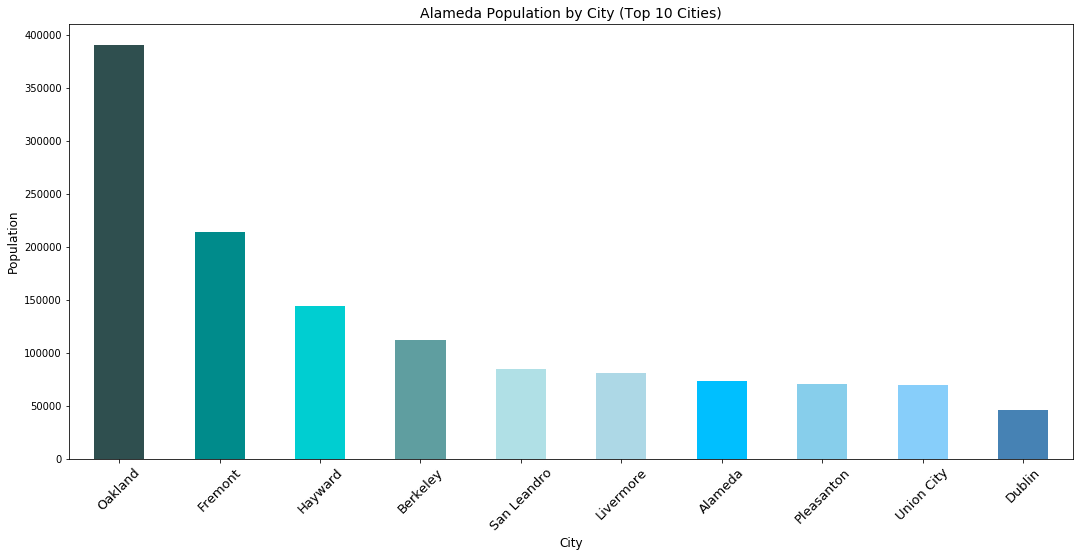

In [20]:
# Plot a bar chart showing population of the top 10 Alameda cities
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

alameda_top10cities.plot.bar(x = 'City', y = 'Population', title = "Alameda Population by City (Top 10 Cities)", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Population', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('City', fontsize=12)
plt.title('Alameda Population by City (Top 10 Cities)', fontsize = 14)
plt.show()

In [21]:
# Use of geopy geocoders to get coordinates of the Alameda cities
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Alameda_explorer")
alameda_top10cities['City_Coord']= alameda_top10cities['City'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
alameda_top10cities[['Latitude', 'Longitude']] = alameda_top10cities['City_Coord'].apply(pd.Series)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [22]:
alameda_top10cities.head()

,City,County,Population,City_Coord,Latitude,Longitude
9,Oakland,Alameda,390724,"(37.8044557, -122.2713563)",37.804456,-122.271356
5,Fremont,Alameda,214089,"(37.5482697, -121.9885719)",37.548270,-121.988572
6,Hayward,Alameda,144186,"(37.6688205, -122.0807964)",37.668821,-122.080796
2,Berkeley,Alameda,112580,"(37.8708393, -122.2728639)",37.870839,-122.272864
12,San Leandro,Alameda,84950,"(37.7249296, -122.1560768)",37.724930,-122.156077


In [23]:
# Remove column 'City_Coord' from the dataframe
alameda_top10cities.drop(['City_Coord'], axis=1, inplace=True)
alameda_top10cities.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,City,County,Population,Latitude,Longitude
9,Oakland,Alameda,390724,37.804456,-122.271356
5,Fremont,Alameda,214089,37.548270,-121.988572
6,Hayward,Alameda,144186,37.668821,-122.080796
2,Berkeley,Alameda,112580,37.870839,-122.272864
12,San Leandro,Alameda,84950,37.724930,-122.156077
7,Livermore,Alameda,80968,37.682058,-121.768053
0,Alameda,Alameda,73812,37.609029,-121.899142
11,Pleasanton,Alameda,70285,37.662431,-121.874679
13,Union City,Alameda,69516,37.596323,-122.081630
3,Dublin,Alameda,46036,53.349764,-6.260273


In [26]:
# Get actual coordinates of Alameda City
address = 'Alameda City, Alameda'

geolocator = Nominatim(user_agent="AlamedaCity_explorer")
location = geolocator.geocode(address)
AlamedaCity_latitude = location.latitude
AlamedaCity_longitude = location.longitude
print('The geograpical coordinates of Alameda city are {}, {}.'.format(AlamedaCity_latitude, AlamedaCity_longitude))

The geograpical coordinates of Alameda city are 37.7652076, -122.2416355.


In [27]:
# Get actual coordinates of Dublin City
address = 'Dublin, Alameda'

geolocator = Nominatim(user_agent="Dublin_explorer")
location = geolocator.geocode(address)
Dublin_latitude = location.latitude
Dublin_longitude = location.longitude
print('The geograpical coordinates of Dublin city are {}, {}.'.format(Dublin_latitude, Dublin_longitude))

The geograpical coordinates of Dublin city are 37.7021521, -121.9357918.


In [28]:
# Update coordinate values of Alameda City and Dublin City in the dataframe
alameda_top10cities.loc[0, 'Latitude'] = AlamedaCity_latitude
alameda_top10cities.loc[0, 'Longitude'] = AlamedaCity_longitude
alameda_top10cities.loc[3, 'Latitude'] = Dublin_latitude
alameda_top10cities.loc[3, 'Longitude'] = Dublin_longitude
alameda_top10cities.head(10)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,City,County,Population,Latitude,Longitude
9,Oakland,Alameda,390724,37.804456,-122.271356
5,Fremont,Alameda,214089,37.548270,-121.988572
6,Hayward,Alameda,144186,37.668821,-122.080796
2,Berkeley,Alameda,112580,37.870839,-122.272864
12,San Leandro,Alameda,84950,37.724930,-122.156077
7,Livermore,Alameda,80968,37.682058,-121.768053
0,Alameda,Alameda,73812,37.765208,-122.241636
11,Pleasanton,Alameda,70285,37.662431,-121.874679
13,Union City,Alameda,69516,37.596323,-122.081630
3,Dublin,Alameda,46036,37.702152,-121.935792


In [30]:
address = 'Alameda County, CA'

geolocator = Nominatim(user_agent="Alameda_explorer")
location = geolocator.geocode(address)
Alameda_latitude = location.latitude
Alameda_longitude = location.longitude
print('The geograpical coordinates of Alameda county are {}, {}.'.format(Alameda_latitude, Alameda_longitude))

The geograpical coordinates of Alameda county are 37.6090291, -121.899142.


Let's build a map of the top 10 Alameda cities.

In [31]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


vincent-0.4.4        | 28 KB     | ##################################### | 1

### Create a Map of the Top 10 Alameda Cities by Population

In [32]:
# Create a map of Alameda cities using latitude and longitude values
map_alameda = folium.Map(location=[Alameda_latitude, Alameda_longitude], zoom_start=11)

# Add markers to map
for lat, lng, label in zip(alameda_top10cities['Latitude'], alameda_top10cities['Longitude'], alameda_top10cities['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alameda)  
    
map_alameda

### Read and Format Crime Data of Alameda County

In [34]:
crime = pd.read_csv('https://opendata.arcgis.com/datasets/76da968f7ef049a086c020191b58a83b_0.csv')
print(crime.shape)
crime.head()

(164305, 15)


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DateTime,RecId,CrimeId,AgencyId,Block,Street,City,State,Zip,CrimeCode,CrimeDescription,Longitude,Latitude,GlobalID,OBJECTID
0,2012/02/20 23:48:00+00,201157,12003001,ACSO,GARDEN AV / W SUNSET BL,GARDEN AV / W SUNSET BL,HAYWARD,CA,94541,999,OUTSIDE WARRANT-FEL,-122.109948,37.666122,8c160d50-75a6-4bda-9fbb-52209bb60520,1
1,2012/02/21 01:02:00+00,201159,12003002,ACSO,MAUBERT AV / MONO AV,MAUBERT AV / MONO AV,SAN LEANDRO,CA,94578,R24,RECOVERED STOLEN AUTO - OUTSIDE AGENCY,-122.110176,37.699303,b8851759-46b4-4cde-8484-57ae9f0eaa18,2
2,2012/02/21 01:24:00+00,201161,12003003,ACSO,BLOSSOM WY / MISSION BL,BLOSSOM WY / MISSION BL,HAYWARD,CA,94541,90C,DISORDERLY CONDUCT:INTOX DRUG WITH ALCOHOL,-122.111126,37.675480,ad26179a-4a96-4259-8b1a-9ce2d7ca5062,3
3,2012/02/21 02:23:00+00,201163,12003004,ACSO,BLOSSOM WY / MISSION BL,BLOSSOM WY / MISSION BL,HAYWARD,CA,94541,90D,DUI ALCOHOL/DRUGS,-122.111126,37.675480,b7822e38-55b5-4000-bba1-1e5d0e6840cf,4
4,2012/02/21 02:23:00+00,201163,12003004,ACSO,BLOSSOM WY / MISSION BL,BLOSSOM WY / MISSION BL,HAYWARD,CA,94541,35A,USE/UNDER INFLUENCE OF CONTROLLED SUBSTANCE,-122.111126,37.675480,aa6d6e77-b500-4de4-9526-52437b94bde0,5


In [37]:
# Take just the columns we need
crime1 = crime[['City','CrimeDescription']]

In [38]:
# Drop all null values
crime2 = crime1.dropna()

In [39]:
crime2.head(100)

,City,CrimeDescription
0,HAYWARD,OUTSIDE WARRANT-FEL
1,SAN LEANDRO,RECOVERED STOLEN AUTO - OUTSIDE AGENCY
2,HAYWARD,DISORDERLY CONDUCT:INTOX DRUG WITH ALCOHOL
3,HAYWARD,DUI ALCOHOL/DRUGS
4,HAYWARD,USE/UNDER INFLUENCE OF CONTROLLED SUBSTANCE
5,HAYWARD,POSSESS/ETC BURGLARY TOOLS
6,SAN LEANDRO,ARREST WARRANT - MISD
7,HAYWARD,USE/UNDER INFLUENCE OF CONTROLLED SUBSTANCE
8,HAYWARD,USE/UNDER INFLUENCE OF CONTROLLED SUBSTANCE
9,HAYWARD,POSSESS CONTROLLED SUBSTANCE PARAPHERNALIA


In [40]:
crime2 = crime2.sort_values('City', ascending = True)
crime2.head()

,City,CrimeDescription
154677,AA,OUTSIDE WARRANT-FEL
126889,AA,TOW VEH OVERDUE REG
6388,AA,UNAUTHORIZED COPY/USE COMPUTER DATA
6389,AA,DISCLOSE DMV RECORDS:PO/ETC HOME ADDRESS:RESUL...
6390,AA,UNAUTHORIZED PERSON RECEIVE/ETC CRIMINAL RECOR...


In [41]:
# Count the number of crimes in each city
crime3 = crime2.groupby('City', as_index=False).count()

In [42]:
# Rename our column to reflect the counts of crime
crime3.rename(columns={'CrimeDescription': 'Num_Crimes'}, inplace = True)
crime3

,City,Num_Crimes
0,AA,108
1,AB,4
2,ALABANY,1
3,ALAMEDA,12
4,ALAMEDA COUNTY,124
5,ALBANY,2
6,ANTIOCH,1
7,BERKELEY,62
8,BYRON,10
9,CASRTO VALLEY,1


### Pick and Sort the Top 10 Alameda Cities by Crime Incidents

In [45]:
# Sort city by number of crimes in descending order
crime4 = crime3.sort_values(by= ['Num_Crimes'], ascending = False)
crime4.head(10)

,City,Num_Crimes
23,HAYWARD,47289
39,SAN LEANDRO,39407
12,CASTRO VALLEY,38591
43,SAN LORENZO,23711
32,OAKLAND,6433
26,LIVERMORE,4779
17,DUBLIN,978
35,PLEASANTON,830
48,SU,581
20,FREMONT,560


In [46]:
# Fix the name SU to SUNOL 
crime4.loc[48, 'City'] = 'SUNOL'

In [49]:
crime5 = crime4.head(10)
crime5.head(10)

,City,Num_Crimes
23,HAYWARD,47289
39,SAN LEANDRO,39407
12,CASTRO VALLEY,38591
43,SAN LORENZO,23711
32,OAKLAND,6433
26,LIVERMORE,4779
17,DUBLIN,978
35,PLEASANTON,830
48,SUNOL,581
20,FREMONT,560


### Plot a Bar Chart showing the Top 10 Alameda Cities by Number of Crime Incidents

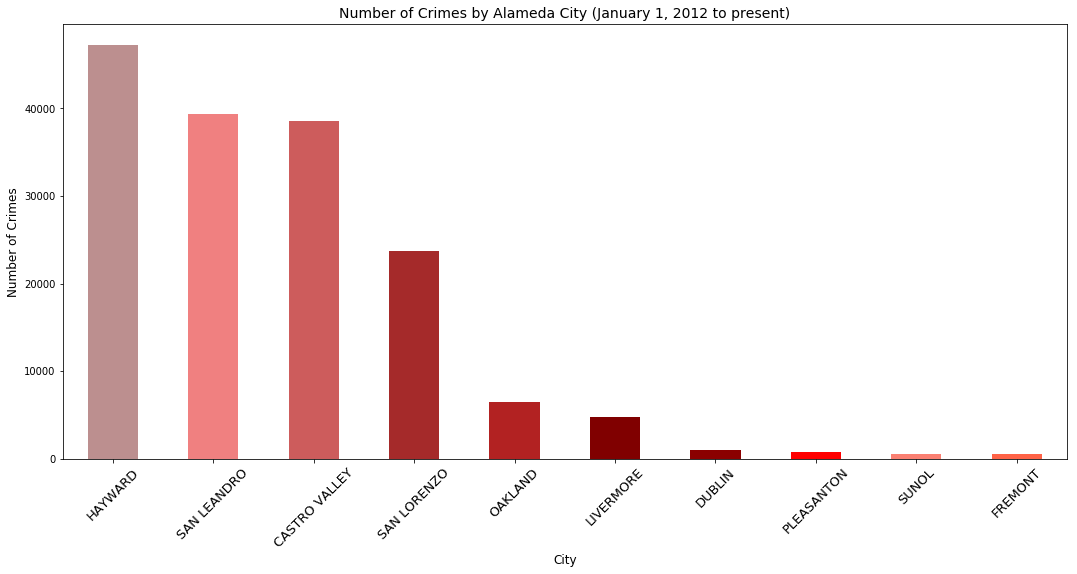

In [50]:
crime5.plot.bar(x = 'City', y = 'Num_Crimes', title = "Number of Crimes by Alameda City", legend = None, rot= 45, figsize = (18, 8), color=['rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato'])
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('City', fontsize=12)
plt.title('Number of Crimes by Alameda City (January 1, 2012 to present)', fontsize = 14)
plt.show()

### Merge Population Dataset and Crime Dataset

In [51]:
# Change City to Uppercase in the alameda_top10cities dataframe in preparation of dataset merging
alameda_top10cities['City'] = alameda_top10cities['City'].str.upper()
alameda_top10cities.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,City,County,Population,Latitude,Longitude
9,OAKLAND,Alameda,390724,37.804456,-122.271356
5,FREMONT,Alameda,214089,37.548270,-121.988572
6,HAYWARD,Alameda,144186,37.668821,-122.080796
2,BERKELEY,Alameda,112580,37.870839,-122.272864
12,SAN LEANDRO,Alameda,84950,37.724930,-122.156077


In [52]:
crime5.head()

,City,Num_Crimes
23,HAYWARD,47289
39,SAN LEANDRO,39407
12,CASTRO VALLEY,38591
43,SAN LORENZO,23711
32,OAKLAND,6433


In [53]:
# Create a dataframe with the 4 highest crime cities
crime6 = crime5.head(4)
crime6.head()

,City,Num_Crimes
23,HAYWARD,47289
39,SAN LEANDRO,39407
12,CASTRO VALLEY,38591
43,SAN LORENZO,23711


In [54]:
# Start by merging the datasets and making a new dataset that incldues the cities which are among the top 10 for population AND are among the top 4 for crime incidents '''
Overlap = alameda_top10cities.merge(crime6, on=['City'])
# Next take this joined dataframe and remove all common values from our list of top 10 cities for population
alameda_selectedcities = alameda_top10cities[(~alameda_top10cities.City.isin(Overlap.City))]
# Then what we have is the top cities for population that are NOT the top cities for crime incidents
alameda_selectedcities.head(10)

alameda_final5 = alameda_selectedcities.head(5)
alameda_final5

,City,County,Population,Latitude,Longitude
9,OAKLAND,Alameda,390724,37.804456,-122.271356
5,FREMONT,Alameda,214089,37.548270,-121.988572
2,BERKELEY,Alameda,112580,37.870839,-122.272864
7,LIVERMORE,Alameda,80968,37.682058,-121.768053
0,ALAMEDA,Alameda,73812,37.765208,-122.241636


### Create a Map of the Final Top 5 Alameda Cities

In [55]:
import folium
# Create a map of the final top 5 Alameda cities 
map_alameda = folium.Map(location=[Alameda_latitude, Alameda_longitude], zoom_start=12)

# Add markers to map
for lat, lng, label in zip(alameda_final5['Latitude'], alameda_final5['Longitude'], 
                           alameda_final5['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_alameda)  
    
map_alameda

### Foursquare API Data Analysis

In [57]:
CLIENT_ID = '5VFGNJLEGKPIJ4O1IDSXPE34S0LDZVTOPYQIFH13LGPO4LQ4'
CLIENT_SECRET = 'F1A1XMS4S0ARUDNPDSSB2Y0EIHF2JIFWEIX0UHL3E5K4IW3M'
VERSION = '20200430'

print('My Foursquare credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

My Foursquare credentails:
My CLIENT_ID: 5VFGNJLEGKPIJ4O1IDSXPE34S0LDZVTOPYQIFH13LGPO4LQ4
My CLIENT_SECRET:F1A1XMS4S0ARUDNPDSSB2Y0EIHF2JIFWEIX0UHL3E5K4IW3M


Now we define a function to search the most popular venues up to 100 venues within 1 mile (1.6 km) radius of our top 5 cities.

In [77]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=1600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [78]:
alameda_venues = getNearbyVenues(names=alameda_final5['City'],
                                   latitudes=alameda_final5['Latitude'],
                                   longitudes=alameda_final5['Longitude']
                                  )

OAKLAND
FREMONT
BERKELEY
LIVERMORE
ALAMEDA


In [79]:
# Print the shape of our dataframe
print(alameda_venues.shape)
alameda_venues.head()

(464, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,OAKLAND,37.804456,-122.271356,Cape & Cowl,37.806725,-122.272747,Comic Shop
1,OAKLAND,37.804456,-122.271356,Oaklandish,37.805075,-122.270726,Clothing Store
2,OAKLAND,37.804456,-122.271356,Woods Bar & Brewery,37.806889,-122.270415,Brewery
3,OAKLAND,37.804456,-122.271356,Bar Shiru,37.806378,-122.270393,Bar
4,OAKLAND,37.804456,-122.271356,Abura-Ya,37.805959,-122.267693,Japanese Restaurant


In [80]:
# Take a look at how many venues were pulled for each city
alameda_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
ALAMEDA,100,100,100,100,100,100
BERKELEY,100,100,100,100,100,100
FREMONT,64,64,64,64,64,64
LIVERMORE,100,100,100,100,100,100
OAKLAND,100,100,100,100,100,100


In [81]:
# Print the number of unique types of venues pulled
print('There are {} uniques categories.'.format(len(alameda_venues['Venue Category'].unique())))

There are 160 uniques categories.


### Plot a Bar Chart showing the Most Commom Venue Types in Final 5 Cities

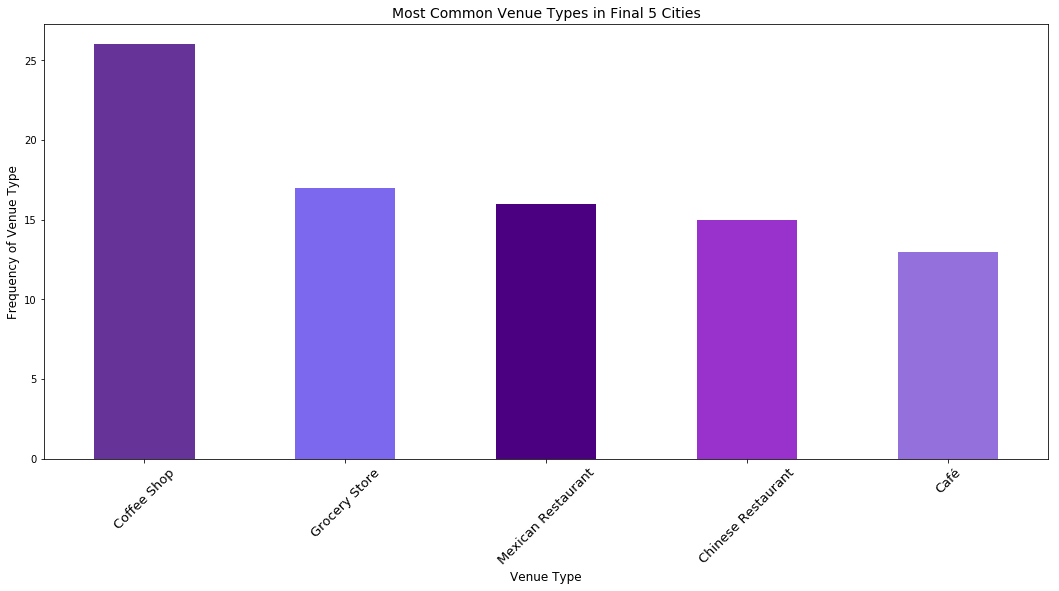

In [83]:
alameda_top_venues = alameda_venues.groupby('Venue Category', as_index = False).count().sort_values('City', ascending = False).head(5)
alameda_top_venues = alameda_top_venues[['Venue Category','City']]
alameda_top_venues.rename(columns={'City': 'Frequency'}, inplace = True)
alameda_top_venues.plot.bar(x='Venue Category', y='Frequency', legend = None, title = "Most common venue types in 5 selected cities", rot= 45, figsize = (18, 8), color=['rebeccapurple','mediumslateblue','indigo','darkorchid','mediumpurple'])
plt.ylabel('Frequency of Venue Type', fontsize=12)
plt.xticks(fontsize=13)
plt.xlabel('Venue Type', fontsize=12)
plt.title('Most Common Venue Types in Final 5 Cities', fontsize = 14)
plt.show()

### Perform One Hot Encoding to Further Analyze Our Data

In [84]:
# One hot encoding
alameda_onehot = pd.get_dummies(alameda_venues[['Venue Category']], prefix="", prefix_sep="")

# Add city column back to dataframe
alameda_onehot['City'] = alameda_venues['City'] 

# Move city column to the first column
fixed_columns = [alameda_onehot.columns[-1]] + list(alameda_onehot.columns[:-1])
alameda_onehot = alameda_onehot[fixed_columns]

alameda_onehot.head()

,City,ATM,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Big Box Store,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Butcher,Café,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Theater,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Latin American Restaurant,Library,Liquor Store,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Record Shop,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Storage Facility,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,OAKLAND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,OAKLAND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,OAKLAND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,OAKLAND,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,OAKLAND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
# Check shape of new dataframe
alameda_onehot.shape

(464, 161)

In [86]:
# Group the data by City
alameda_grouped = alameda_onehot.groupby('City').mean().reset_index()
print(alameda_grouped.shape)
alameda_grouped

(5, 161)


,City,ATM,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Garden,Big Box Store,Bookstore,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Butcher,Café,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Theater,Comic Shop,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Event Space,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Fondue Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kids Store,Latin American Restaurant,Library,Liquor Store,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Record Shop,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Storage Facility,Street Food Gathering,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trade School,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
0,ALAMEDA,0.00,0.01,0.010000,0.01,0.00,0.00,0.00,0.00,0.00,0.000000,0.03000,0.01,0.01,0.01,0.00,0.00,0.000000,0.010000,0.00,0.00,0.010000,0.01,0.010000,0.01,0.01,0.01,0.00,0.03000,0.01,0.00,0.00,0.0100,0.00,0.030000,0.00,0.040000,0.00,0.00,0.00,0.000000,0.010000,0.01,0.00,0.00,0.02,0.00,0.020000,0.02,0.01,0.00,0.00,0.01,0.01,0.000000,0.00000,0.01,0.00,0.01,0.00,0.00,0.00,0.000000,0.00,0.00000,0.000000,0.00,0.00,0.01,0.00,0.00,0.010000,0.01,0.00,0.00,0.05000,0.010000,0.010000,0.01,0.01,0.010000,0.00,0.01,0.00,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.010000,0.000000,0.00,0.010000,0.02,0.00,0.000000,0.00,0.000000,0.01,0.040000,0.02,0.000000,0.00,0.01,0.00,0.010000,0.00,0.01,0.01,0.00,0.01,0.000000,0.000000,0.030000,0.00,0.01000,0.00,0.04000,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.020000,0.00,0.00,0.000000,0.01,0.01,0.000000,0.00,0.00,0.010000,0.00,0.00,0.00,0.01,0.00,0.02000,0.00,0.00,0.00,0.020000,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.01,0.00
1,BERKELEY,0.00,0.00,0.030000,0.00,0.00,0.01,0.00,0.02,0.00,0.000000,0.01000,0.00,0.01,0.00,0.01,0.01,0.010000,0.040000,0.00,0.01,0.010000,0.02,0.020000,0.01,0.00,0.01,0.01,0.03000,0.00,0.00,0.01,0.0200,0.00,0.000000,0.01,0.060000,0.01,0.01,0.00,0.000000,0.010000,0.00,0.01,0.01,0.00,0.00,0.000000,0.00,0.00,0.01,0.00,0.00,0.00,0.000000,0.00000,0.01,0.00,0.00,0.00,0.00,0.00,0.000000,0.01,0.00000,0.000000,0.00,0.00,0.01,0.01,0.00,0.000000,0.00,0.01,0.00,0.02000,0.010000,0.000000,0.00,0.00,0.000000,0.01,0.01,0.01,0.020000,0.010000,0.00,0.000000,0.000000,0.00,0.030000,0.040000,0.00,0.000000,0.00,0.01,0.000000,0.01,0.000000,0.01,0.020000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.02,0.00,0.03,0.00,0.00,0.000000,0.010000,0.020000,0.01,0.01000,0.00,0.02000,0.00,0.00,0.00,0.01,0.00,0.01,0.

In [87]:
# Print each city with the top 5 most common venues
num_top_venues = 5

for hood in alameda_grouped['City']:
    print("----"+hood+"----")
    temp = alameda_grouped[alameda_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ALAMEDA----
                venue  freq
0       Grocery Store  0.05
1         Pizza Place  0.04
2         Coffee Shop  0.04
3  Mexican Restaurant  0.04
4                Park  0.03


----BERKELEY----
                 venue  freq
0          Coffee Shop  0.06
1  Japanese Restaurant  0.04
2            Bookstore  0.04
3   Italian Restaurant  0.03
4                 Café  0.03


----FREMONT----
                venue  freq
0       Grocery Store  0.09
1  Chinese Restaurant  0.06
2         Coffee Shop  0.05
3    Sushi Restaurant  0.03
4              Bakery  0.03


----LIVERMORE----
                venue  freq
0      Sandwich Place  0.08
1  Mexican Restaurant  0.06
2         Coffee Shop  0.05
3                 Bar  0.04
4      Ice Cream Shop  0.03


----OAKLAND----
                venue  freq
0         Coffee Shop  0.08
1  Chinese Restaurant  0.05
2                Café  0.04
3         Beer Garden  0.04
4                 Bar  0.04




In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [89]:
num_top_venues = 30

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = alameda_grouped['City']

for ind in np.arange(alameda_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alameda_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
0,ALAMEDA,Grocery Store,Pizza Place,Coffee Shop,Mexican Restaurant,Park,Bakery,Café,Clothing Store,Middle Eastern Restaurant,Sandwich Place,Kids Store,Dessert Shop,Diner,Sushi Restaurant,Discount Store,Wine Shop,Thai Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Eastern European Restaurant,Flea Market,Chinese Restaurant,New American Restaurant,Nail Salon,Music Store,Farmers Market,Multiplex,Garden Center,Event Space,Mediterranean Restaurant
1,BERKELEY,Coffee Shop,Japanese Restaurant,Bookstore,New American Restaurant,American Restaurant,Café,Italian Restaurant,Asian Restaurant,Taco Place,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Pizza Place,Park,Music Venue,Brewery,Ice Cream Shop,Grocery Store,Bubble Tea Shop,Yoga Studio,Butcher,Gourmet Shop,Paper / Office Supplies Store,Performing Arts Venue,Pet Store,Cheese Shop,Mediterranean Restaurant,Dog Run,Cocktail Bar,College Gym
2,FREMONT,Grocery Store,Chinese Restaurant,Coffee Shop,Fried Chicken Joint,Pizza Place,Pet Store,Falafel Restaurant,Café,Sushi Restaurant,Bakery,Music Store,Mexican Restaurant,Mobile Phone Shop,Optical Shop,Cosmetics Shop,Convenience Store,Massage Studio,Paper / Office Supplies Store,Clothing Store,Diner,Health & Beauty Service,Library,Juice Bar,Italian Restaurant,Intersection,Insurance Office,Indian Restaurant,Ice Cream Shop,Eye Doctor,Gym / Fitness Center
3,LIVERMORE,Sandwich Place,Mexican Restaurant,Coffee Shop,Bar,Chinese Restaurant,Ice Cream Shop,Pizza Place,Burger Joint,Fast Food Restaurant,Farmers Market,Salon / Barbershop,Dive Bar,Restaurant,Sushi Restaurant,Gym,Grocery Store,Pub,BBQ Joint,Pharmacy,Indie Movie Theater,Juice Bar,Indian Restaurant,Latin American Restaurant,Liquor Store,Middle Eastern Restaurant,Hot Dog Joint,Italian Restaurant,Health & Beauty Service,Greek Restaurant,Gastropub
4,OAKLAND,Coffee Shop,Chinese Restaurant,Beer Garden,Bar,Café,Bakery,Mexican Restaurant,Vietnamese Restaurant,Ice Cream Shop,Seafood Restaurant,Grocery Store,Gym,Nightclub,Brewery,Music Venue,Dive Bar,Dessert Shop,Beer Bar,Bubble Tea Shop,Wine Bar,Street Food Gathering,Museum,Sports Bar,Performing Arts Venue,Hot Dog Joint,Climbing Gym,Food & Drink Shop,Clothing Store,Cocktail Bar,Food Court


### Plot a Bar Chart showing Number of Restaurauts in the Final 5 Alameda Cities

[23, 30, 15, 26, 21]


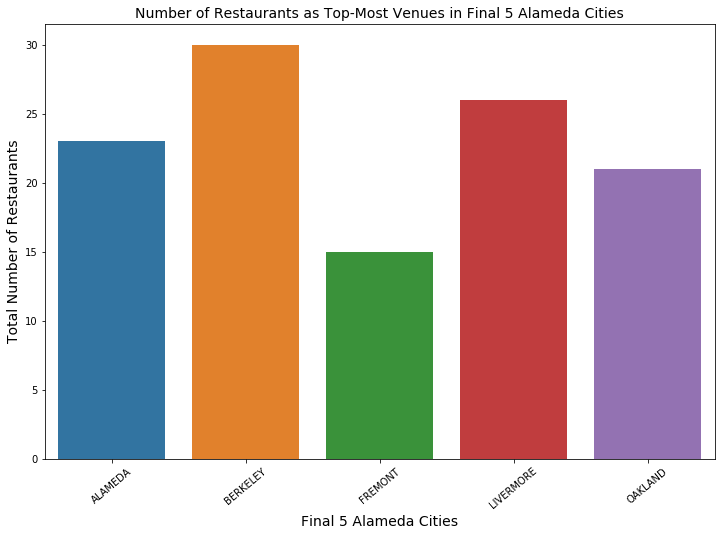

In [91]:
# Try groupby to play with restaurant 
alameda_venues_restaurant = alameda_venues.groupby(['City'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
alameda_venues_restaurant_df = alameda_venues_restaurant.to_frame().reset_index()
alameda_venues_restaurant_df.columns = ['City', 'Number of Restaurants']
alameda_venues_restaurant_df.index = np.arange(1, len(alameda_venues_restaurant_df)+1)

list_rest_no = alameda_venues_restaurant_df['Number of Restaurants'].to_list()
print (list_rest_no)

import seaborn as sns
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='City', y='Number of Restaurants', data=alameda_venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Final 5 Alameda Cities", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues in Final 5 Alameda Cities", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

### Perform K-Means Clustering on the Final 5 Alameda Cities

In [92]:
# Set number of clusters
kclusters = 3

alameda_grouped_clustering = alameda_grouped.drop('City', 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(alameda_grouped_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 1, 2, 0], dtype=int32)

In [93]:
# Add clustering label
cities_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

alameda_merged = alameda_final5

In [94]:
# Merge alameda_grouped with alameda_data to add latitude and longitude values for each city
alameda_merged = alameda_merged.join(cities_venues_sorted.set_index('City'), on='City')

In [95]:
alameda_merged['Latitude'] = alameda_merged['Latitude'].astype(float)
alameda_merged['Longitude'] = alameda_merged['Longitude'].astype(float)
alameda_merged['Cluster Label'] = alameda_merged['Cluster Label'].astype(int)
alameda_merged.head()

,City,County,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
9,OAKLAND,Alameda,390724,37.804456,-122.271356,0,Coffee Shop,Chinese Restaurant,Beer Garden,Bar,Café,Bakery,Mexican Restaurant,Vietnamese Restaurant,Ice Cream Shop,Seafood Restaurant,Grocery Store,Gym,Nightclub,Brewery,Music Venue,Dive Bar,Dessert Shop,Beer Bar,Bubble Tea Shop,Wine Bar,Street Food Gathering,Museum,Sports Bar,Performing Arts Venue,Hot Dog Joint,Climbing Gym,Food & Drink Shop,Clothing Store,Cocktail Bar,Food Court
5,FREMONT,Alameda,214089,37.548270,-121.988572,1,Grocery Store,Chinese Restaurant,Coffee Shop,Fried Chicken Joint,Pizza Place,Pet Store,Falafel Restaurant,Café,Sushi Restaurant,Bakery,Music Store,Mexican Restaurant,Mobile Phone Shop,Optical Shop,Cosmetics Shop,Convenience Store,Massage Studio,Paper / Office Supplies Store,Clothing Store,Diner,Health & Beauty Service,Library,Juice Bar,Italian Restaurant,Intersection,Insurance Office,Indian Restaurant,Ice Cream Shop,Eye Doctor,Gym / Fitness Center
2,BERKELEY,Alameda,112580,37.870839,-122.272864,0,Coffee Shop,Japanese Restaurant,Bookstore,New American Restaurant,American Restaurant,Café,Italian Restaurant,Asian Restaurant,Taco Place,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Pizza Place,Park,Music Venue,Brewery,Ice Cream Shop,Grocery Store,Bubble Tea Shop,Yoga Studio,Butcher,Gourmet Shop,Paper / Office Supplies Store,Performing Arts Venue,Pet Store,Cheese Shop,Mediterranean Restaurant,Dog Run,Cocktail Bar,College Gym
7,LIVERMORE,Alameda,80968,37.682058,-121.768053,2,Sandwich Place,Mexican Restaurant,Coffee Shop,Bar,Chinese Restaurant,Ice Cream Shop,Pizza Place,Burger Joint,Fast Food Restaurant,Farmers Market,Salon / Barbershop,Dive Bar,Restaurant,Sushi Restaurant,Gym,Grocery Store,Pub,BBQ Joint,Pharmacy,Indie Movie Theater,Juice Bar,Indian Restaurant,Latin American Restaurant,Liquor Store,Middle Eastern Restaurant,Hot Dog Joint,Italian Restaurant,Health & Beauty Service,Greek Restaurant,Gastropub
0,ALAMEDA,Alameda,73812,37.765208,-122.241636,1,Grocery Store,Pizza Place,Coffee Shop,Mexican Restaurant,Park,Bakery,Café,Clothing Store,Middle Eastern Restaurant,Sandwich Place,Kids Store,Dessert Shop,Diner,Sushi Restaurant,Discount Store,Wine Shop,Thai Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Eastern European Restaurant,Flea Market,Chinese Restaurant,New American Restaurant,Nail Salon,Music Store,Farmers Market,Multiplex,Garden Center,Event Space,Mediterranean Restaurant


In [96]:
alameda_merged.head()

,City,County,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
9,OAKLAND,Alameda,390724,37.804456,-122.271356,0,Coffee Shop,Chinese Restaurant,Beer Garden,Bar,Café,Bakery,Mexican Restaurant,Vietnamese Restaurant,Ice Cream Shop,Seafood Restaurant,Grocery Store,Gym,Nightclub,Brewery,Music Venue,Dive Bar,Dessert Shop,Beer Bar,Bubble Tea Shop,Wine Bar,Street Food Gathering,Museum,Sports Bar,Performing Arts Venue,Hot Dog Joint,Climbing Gym,Food & Drink Shop,Clothing Store,Cocktail Bar,Food Court
5,FREMONT,Alameda,214089,37.548270,-121.988572,1,Grocery Store,Chinese Restaurant,Coffee Shop,Fried Chicken Joint,Pizza Place,Pet Store,Falafel Restaurant,Café,Sushi Restaurant,Bakery,Music Store,Mexican Restaurant,Mobile Phone Shop,Optical Shop,Cosmetics Shop,Convenience Store,Massage Studio,Paper / Office Supplies Store,Clothing Store,Diner,Health & Beauty Service,Library,Juice Bar,Italian Restaurant,Intersection,Insurance Office,Indian Restaurant,Ice Cream Shop,Eye Doctor,Gym / Fitness Center
2,BERKELEY,Alameda,112580,37.870839,-122.272864,0,Coffee Shop,Japanese Restaurant,Bookstore,New American Restaurant,American Restaurant,Café,Italian Restaurant,Asian Restaurant,Taco Place,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Pizza Place,Park,Music Venue,Brewery,Ice Cream Shop,Grocery Store,Bubble Tea Shop,Yoga Studio,Butcher,Gourmet Shop,Paper / Office Supplies Store,Performing Arts Venue,Pet Store,Cheese Shop,Mediterranean Restaurant,Dog Run,Cocktail Bar,College Gym
7,LIVERMORE,Alameda,80968,37.682058,-121.768053,2,Sandwich Place,Mexican Restaurant,Coffee Shop,Bar,Chinese Restaurant,Ice Cream Shop,Pizza Place,Burger Joint,Fast Food Restaurant,Farmers Market,Salon / Barbershop,Dive Bar,Restaurant,Sushi Restaurant,Gym,Grocery Store,Pub,BBQ Joint,Pharmacy,Indie Movie Theater,Juice Bar,Indian Restaurant,Latin American Restaurant,Liquor Store,Middle Eastern Restaurant,Hot Dog Joint,Italian Restaurant,Health & Beauty Service,Greek Restaurant,Gastropub
0,ALAMEDA,Alameda,73812,37.765208,-122.241636,1,Grocery Store,Pizza Place,Coffee Shop,Mexican Restaurant,Park,Bakery,Café,Clothing Store,Middle Eastern Restaurant,Sandwich Place,Kids Store,Dessert Shop,Diner,Sushi Restaurant,Discount Store,Wine Shop,Thai Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Eastern European Restaurant,Flea Market,Chinese Restaurant,New American Restaurant,Nail Salon,Music Store,Farmers Market,Multiplex,Garden Center,Event Space,Mediterranean Restaurant


### Create a Map Clustering the Final 5 Alameda Cities

In [97]:
# Create map
map_clusters = folium.Map(location=[Alameda_latitude, Alameda_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(alameda_merged['Latitude'], 
                                  alameda_merged['Longitude'], 
                                  alameda_merged['City'], 
                                  alameda_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Create another Map showing the Three Clusters with radius representing the Number of Restaurants in the City

In [99]:
# Create map
map_restaurants10 = folium.Map(location=[Alameda_latitude, Alameda_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Cities = ['ALAMEDA', 'BERKELEY', 'FREMONT', 'LIVERMORE', 'OAKLAND']

# Add markers to the map
for lat, lon, poi, cluster in zip(alameda_merged['Latitude'], 
                                  alameda_merged['Longitude'], 
                                  alameda_merged['City'], 
                                  alameda_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Cities.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

### Examine the Three Clusters

#### Cluster 0

In [100]:
Alameda_Cluster0 = alameda_merged.loc[alameda_merged['Cluster Label'] == 0]
print ("Number of Cities in Cluster Label 0: %d" %(Alameda_Cluster0.shape[0]))
Alameda_Cluster0

Number of Cities in Cluster Label 0: 2


,City,County,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
9,OAKLAND,Alameda,390724,37.804456,-122.271356,0,Coffee Shop,Chinese Restaurant,Beer Garden,Bar,Café,Bakery,Mexican Restaurant,Vietnamese Restaurant,Ice Cream Shop,Seafood Restaurant,Grocery Store,Gym,Nightclub,Brewery,Music Venue,Dive Bar,Dessert Shop,Beer Bar,Bubble Tea Shop,Wine Bar,Street Food Gathering,Museum,Sports Bar,Performing Arts Venue,Hot Dog Joint,Climbing Gym,Food & Drink Shop,Clothing Store,Cocktail Bar,Food Court
2,BERKELEY,Alameda,112580,37.870839,-122.272864,0,Coffee Shop,Japanese Restaurant,Bookstore,New American Restaurant,American Restaurant,Café,Italian Restaurant,Asian Restaurant,Taco Place,Chinese Restaurant,Thai Restaurant,Mexican Restaurant,Pizza Place,Park,Music Venue,Brewery,Ice Cream Shop,Grocery Store,Bubble Tea Shop,Yoga Studio,Butcher,Gourmet Shop,Paper / Office Supplies Store,Performing Arts Venue,Pet Store,Cheese Shop,Mediterranean Restaurant,Dog Run,Cocktail Bar,College Gym


#### Cluster 1

In [101]:
Alameda_Cluster1 = alameda_merged.loc[alameda_merged['Cluster Label'] == 1]
print ("Number of Cities in Cluster Label 1: %d" %(Alameda_Cluster1.shape[0]))
Alameda_Cluster1

Number of Cities in Cluster Label 1: 2


,City,County,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
5,FREMONT,Alameda,214089,37.548270,-121.988572,1,Grocery Store,Chinese Restaurant,Coffee Shop,Fried Chicken Joint,Pizza Place,Pet Store,Falafel Restaurant,Café,Sushi Restaurant,Bakery,Music Store,Mexican Restaurant,Mobile Phone Shop,Optical Shop,Cosmetics Shop,Convenience Store,Massage Studio,Paper / Office Supplies Store,Clothing Store,Diner,Health & Beauty Service,Library,Juice Bar,Italian Restaurant,Intersection,Insurance Office,Indian Restaurant,Ice Cream Shop,Eye Doctor,Gym / Fitness Center
0,ALAMEDA,Alameda,73812,37.765208,-122.241636,1,Grocery Store,Pizza Place,Coffee Shop,Mexican Restaurant,Park,Bakery,Café,Clothing Store,Middle Eastern Restaurant,Sandwich Place,Kids Store,Dessert Shop,Diner,Sushi Restaurant,Discount Store,Wine Shop,Thai Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Eastern European Restaurant,Flea Market,Chinese Restaurant,New American Restaurant,Nail Salon,Music Store,Farmers Market,Multiplex,Garden Center,Event Space,Mediterranean Restaurant


#### Cluster 2

In [102]:
Alameda_Cluster2 = alameda_merged.loc[alameda_merged['Cluster Label'] == 2]
print ("Number of Cities in Cluster Label 2: %d" %(Alameda_Cluster2.shape[0]))
Alameda_Cluster2

Number of Cities in Cluster Label 2: 1


,City,County,Population,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue
7,LIVERMORE,Alameda,80968,37.682058,-121.768053,2,Sandwich Place,Mexican Restaurant,Coffee Shop,Bar,Chinese Restaurant,Ice Cream Shop,Pizza Place,Burger Joint,Fast Food Restaurant,Farmers Market,Salon / Barbershop,Dive Bar,Restaurant,Sushi Restaurant,Gym,Grocery Store,Pub,BBQ Joint,Pharmacy,Indie Movie Theater,Juice Bar,Indian Restaurant,Latin American Restaurant,Liquor Store,Middle Eastern Restaurant,Hot Dog Joint,Italian Restaurant,Health & Beauty Service,Greek Restaurant,Gastropub


This concludes the capstone project for Week 2 using the IBM Watson notebook.